# Stable Diffusion 2 Models with Diffusers (Hugging Face)

This example shows how to generate images using Stable Diffusion 2.

In [2]:
import torch
from diffusers import StableDiffusionPipeline


def generate_image(
    prompt: str,
    model_id: str = "stabilityai/stable-diffusion-2",
    seed: int | None = None,
):

    device = (
        "mps"
        if torch.backends.mps.is_available()
        else "cuda" if torch.cuda.is_available() else "cpu"
    )

    # Load the pipeline
    if model_id is None:
        model_id = "stabilityai/stable-diffusion-2"

    pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

    # Set up a generator for reproducibility
    if seed is not None:
        generator = torch.Generator(device=device).manual_seed(seed)
    else:
        generator = torch.Generator(device=device)

    # Run the pipeline
    pipe_output = pipe(
        prompt=prompt,  # What to generate
        # negative_prompt="Oversaturated, blurry, low quality",  # What NOT to generate
        # height=480,
        # width=640,  # Specify the image size
        guidance_scale=8,  # How strongly to follow the prompt
        num_inference_steps=35,  # How many steps to take
        generator=generator,  # Fixed random seed
    )

    # Return the generated image
    return pipe_output.images[0]

## stable-diffusion-2

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

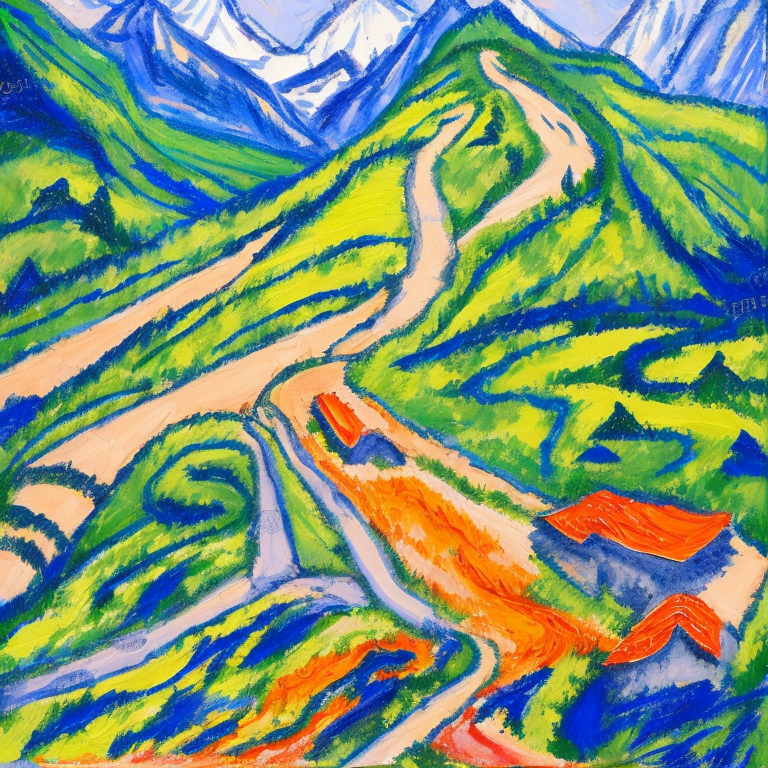

In [3]:
prompt = """An Expressionist and Fauvist-style painting of a vibrant summer 
scene in the Swiss Alps. A winding mountain pass leads to a summit where a 
road bike rests. Majestic alpine peaks rise in the background, surrounded 
by lush green meadows and under clear blue skies, creating a dynamic, 
vividly textured landscape full of color and emotion."""

generate_image(prompt, model_id="stabilityai/stable-diffusion-2")